### TASK 1

#### 1. Getting Data

In [ ]:
# Basic imports
import sklearn.datasets
import pandas as pd
import numpy as np


In [ ]:
wine = sklearn.datasets.load_wine() # Loads wine dataset
a = pd.DataFrame(wine.data, columns = wine.feature_names)
a['class'] = pd.Series(wine.target)

# Cleans data set to only include desired coloumns for attributes
df = a.loc[:, ['color_intensity', 'hue', 'proline', 'class']]
df = df[df['class'] != 1]
df['class'].replace(2, 1, inplace=True)

# Keeps an even number of instances by dropping the last value
if len(df) % 2 != 0:
  df.drop(df.tail(1).index,inplace=True)

df.head()


,color_intensity,hue,proline,class
0,5.64,1.04,1065.0,0
1,4.38,1.05,1050.0,0
2,5.68,1.03,1185.0,0
3,7.80,0.86,1480.0,0
4,4.32,1.04,735.0,0


#### 2. Divide the data into training and test set

In [ ]:
# Imports train split method and splits up the classes and attributes to seperate variables

from sklearn.model_selection import train_test_split
dfX = df.drop(columns = ['class'])
sy = df['class']

# Split into training and testing dataset
"""
Here:
  - dfX_train means training dataset
  - dfX_test means test dataset

  - sy_train means classes that are going to be used to train
  - sy_test means classes that are going to be used to test
"""

dfX_train, dfX_test, sy_train, sy_test = train_test_split(dfX, sy, train_size=0.5)

print(f"{dfX_train}\n{dfX_test}\n{sy_train}\n{sy_test}")


     color_intensity   hue  proline
0               5.64  1.04   1065.0
134             5.45  0.75    650.0
144             8.21  0.65    855.0
54              5.85  0.92   1060.0
48              6.20  1.07   1060.0
175            10.20  0.59    835.0
52              7.05  1.01   1190.0
39              5.10  0.89    760.0
163             5.28  0.68    675.0
137             5.00  0.82    515.0
21              4.50  1.03    770.0
40              6.13  0.95    795.0
149             9.40  0.57    550.0
156             9.01  0.57    480.0
12              5.60  1.15   1320.0
165             6.62  0.78    520.0
168             8.66  0.74    750.0
20              5.65  1.09    780.0
8               5.20  1.08   1045.0
161             5.88  0.96    680.0
151            10.80  0.48    480.0
26              4.80  0.92   1195.0
51              5.60  1.24   1265.0
46              4.90  1.04   1065.0
135             7.10  0.73    695.0
50              7.20  1.12   1150.0
3               7.80  0.86  

#### 3. Data Preprocessing

In [ ]:
# Starts pre proccessing process

from sklearn import preprocessing

le = preprocessing.LabelEncoder() 
le



LabelEncoder()

In [ ]:
# Fits the label encoder
le=le.fit(sy_train)
le.classes_

array([0, 1])

In [ ]:
# Transforms the labels into numbers

y_train = le.transform(sy_train)
sy_train, y_train

(0      0
 134    1
 144    1
 54     0
 48     0
 175    1
 52     0
 39     0
 163    1
 137    1
 21     0
 40     0
 149    1
 156    1
 12     0
 165    1
 168    1
 20     0
 8      0
 161    1
 151    1
 26     0
 51     0
 46     0
 135    1
 50     0
 3      0
 18     0
 152    1
 28     0
 159    1
 45     0
 150    1
 47     0
 138    1
 131    1
 32     0
 37     0
 133    1
 25     0
 1      0
 2      0
 140    1
 14     0
 33     0
 154    1
 157    1
 34     0
 11     0
 15     0
 164    1
 170    1
 147    1
 Name: class, dtype: int64,
 array([0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1]))

In [ ]:
# Creating a dataset with normalized attribute values

nl = preprocessing.MinMaxScaler()
nl = nl.fit(dfX_train.to_numpy())

X_train = nl.transform(dfX_train.to_numpy())
X_train

array([[0.25214198, 0.7       , 0.50996016],
       [0.22888617, 0.3375    , 0.17928287],
       [0.56670747, 0.2125    , 0.34262948],
       [0.27784578, 0.55      , 0.5059761 ],
       [0.32068543, 0.7375    , 0.5059761 ],
       [0.81028152, 0.1375    , 0.32669323],
       [0.4247246 , 0.6625    , 0.60956175],
       [0.18604651, 0.5125    , 0.26693227],
       [0.20807834, 0.25      , 0.19920319],
       [0.17380661, 0.425     , 0.07171315],
       [0.1126071 , 0.6875    , 0.2749004 ],
       [0.3121175 , 0.5875    , 0.29482072],
       [0.7123623 , 0.1125    , 0.09960159],
       [0.66462668, 0.1125    , 0.0438247 ],
       [0.24724602, 0.8375    , 0.71314741],
       [0.37209302, 0.375     , 0.07569721],
       [0.62178703, 0.325     , 0.25896414],
       [0.25336597, 0.7625    , 0.28286853],
       [0.19828641, 0.75      , 0.4940239 ],
       [0.28151775, 0.6       , 0.20318725],
       [0.88372093, 0.        , 0.0438247 ],
       [0.14932681, 0.55      , 0.61354582],
       [0.

#### 4. Building the machine learning model for classification

In [ ]:
# Gets shape data of the training dataset for reference
X_train.shape

(53, 3)

In [ ]:
# Builds classifer
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
knn

KNeighborsClassifier(n_neighbors=10)

#### 5. Evaluation of the Model Using test sets

In [ ]:
# Build the attribute test set
X_test = nl.transform(dfX_test.to_numpy())
dfX_test, X_test

(     color_intensity   hue  proline
 136         3.850000  0.75    720.0
 57          6.000000  1.07   1270.0
 173         7.700000  0.64    740.0
 22          3.800000  1.11   1035.0
 29          4.700000  1.04   1035.0
 43          4.360000  0.82    680.0
 132         5.700000  0.66    560.0
 13          5.400000  1.25   1150.0
 35          5.100000  1.04    920.0
 142         4.350000  0.89    520.0
 38          3.700000  1.18   1020.0
 41          4.280000  0.91   1035.0
 169         8.500000  0.67    630.0
 162         5.580000  0.87    570.0
 146         4.900000  0.58    415.0
 145         4.000000  0.60    830.0
 158        13.000000  0.57    660.0
 6           5.250000  1.02   1290.0
 31          6.900000  1.09   1515.0
 55          6.250000  0.98   1120.0
 153        10.520000  0.56    675.0
 174         7.300000  0.70    750.0
 19          5.100000  0.96    845.0
 176         9.300000  0.60    840.0
 10          5.750000  1.25   1510.0
 160         7.650000  0.56    520.0
 

In [ ]:
# Build the class test set
y_test = le.transform(sy_test.to_numpy())
sy_test, y_test

(136    1
 57     0
 173    1
 22     0
 29     0
 43     0
 132    1
 13     0
 35     0
 142    1
 38     0
 41     0
 169    1
 162    1
 146    1
 145    1
 158    1
 6      0
 31     0
 55     0
 153    1
 174    1
 19     0
 176    1
 10     0
 160    1
 44     0
 5      0
 155    1
 143    1
 42     0
 4      0
 16     0
 171    1
 56     0
 17     0
 30     0
 130    1
 139    1
 27     0
 148    1
 141    1
 58     0
 166    1
 23     0
 172    1
 167    1
 24     0
 49     0
 9      0
 53     0
 36     0
 7      0
 Name: class, dtype: int64,
 array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0]))

In [ ]:
# Applies the model to predicts the class
knn.predict(X_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Compare to see what the actual classes are
y_test

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Score of the test dataset
knn.score(X_test, y_test)

0.9811320754716981

In [ ]:
# Score of the training dataset
knn.score(X_train, y_train)

0.9622641509433962

#### 6. Application of the model for prediction (classification of new example)

In [ ]:
# Chooses random values to test for a prediction
new_example_rawdata = np.array([[7.7, 0.64, 1000]])
X_new = nl.transform(new_example_rawdata)
X_new

array([[0.50428397, 0.2       , 0.45816733]])

In [ ]:
# Predicts the class
knn.predict(X_new)

array([1])

In [ ]:
le.inverse_transform(knn.predict(X_new))

array([1])

### TASK 2

In [ ]:
knn.score(X_test, y_test)

0.9811320754716981

In [ ]:
knn.score(X_train, y_train)

0.9622641509433962

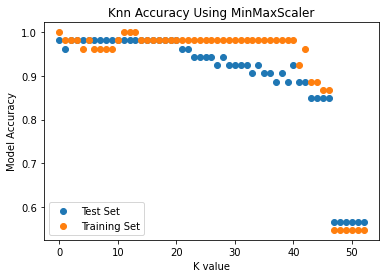

In [ ]:
import matplotlib.pyplot as plt

knn_table = []
x = []

for i in range(53):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train, y_train)
  knn_table.append(knn)
  x.append(i)


y1 = []
y2 = []

for i in range(53):
  y1.append(knn_table[i].score(X_test, y_test))
  y2.append(knn_table[i].score(X_train, y_train))

plt.xlabel('K value')
plt.ylabel('Model Accuracy')
plt.scatter(x, y1, label ='Test Set')
plt.scatter(x, y2, label ='Training Set')
plt.legend()
plt.title("Knn Accuracy Using MinMaxScaler")
plt.show()


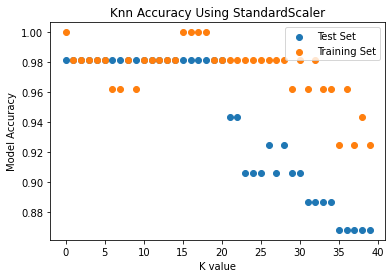

In [ ]:
nl = preprocessing.StandardScaler()
nl = nl.fit(dfX_train.to_numpy())

X_train = nl.transform(dfX_train.to_numpy())

knn = KNeighborsClassifier(n_neighbors=10)
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())



knn_table = []
x = []

for i in range(40):
  knn = KNeighborsClassifier(n_neighbors=i+1)
  knn.fit(X_train, y_train)
  knn_table.append(knn)
  x.append(i)


y1 = []
y2 = []

for i in range(40):
  y1.append(knn_table[i].score(X_test, y_test))
  y2.append(knn_table[i].score(X_train, y_train))

plt.xlabel('K value')
plt.ylabel('Model Accuracy')
plt.scatter(x, y1, label ='Test Set')
plt.scatter(x, y2, label ='Training Set')
plt.legend()
plt.title("Knn Accuracy Using StandardScaler")
plt.show()

### Task 3

- We have chosen a k value of 10 using the MinMaxScaler


In [ ]:
# Setting final model with k value of 10

nl = preprocessing.MinMaxScaler()
nl = nl.fit(dfX_train.to_numpy())

X_train = nl.transform(dfX_train.to_numpy())

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2 = knn2.fit(X_train, y_train)
y_test = le.transform(sy_test.to_numpy())
X_test = nl.transform(dfX_test.to_numpy())

In [ ]:
knn2.score(X_test, y_test)

0.9811320754716981

In [ ]:
knn2.score(X_train, y_train)

0.9622641509433962

In [ ]:
# Gets the Confusion Matrix
from sklearn.metrics import confusion_matrix

y_test.shape, y_train.shape
confusion_matrix(y_train, y_test)

array([[17, 12],
       [13, 11]])

### Task 4 - Apply the Model

In [ ]:
# Chooses  values to test for a prediction

new_example_rawdata2 = np.array([[6, 1.01, 1100]])
X_new = nl.transform(new_example_rawdata2)
knn2.predict(X_new)


array([0])